In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/measurements.csv')

## Initial data exploration

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df.shape

(388, 12)

In [5]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [7]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [14]:
for col in df:
    print(col, df[col].nunique(dropna=False))

distance 174
consume 43
speed 60
temp_inside 14
temp_outside 33
specials 13
gas_type 2
AC 2
rain 2
sun 2
refill liters 11
refill gas 3


In [ ]:
categorical = ['gas_type', 'AC', 'rain', 'sun', 'refill liters','refill gas']

In [16]:
df['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [17]:
df['rain'].value_counts()

rain
0    340
1     48
Name: count, dtype: int64

In [18]:
df['sun'].value_counts()

sun
0    356
1     32
Name: count, dtype: int64

In [19]:
df['AC'].value_counts()

AC
0    358
1     30
Name: count, dtype: int64

In [20]:
df['refill liters'].value_counts()

refill liters
45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: count, dtype: int64

In [21]:
df['refill gas'].value_counts()

refill gas
SP98    8
E10     5
Name: count, dtype: int64

In [22]:
df[df['refill gas'].notna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,NaN,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,NaN,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,rain,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,NaN,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,half rain half sun,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,NaN,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,NaN,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,rain,SP98,0,1,0,41,SP98


## Data cleaning

**Remove two last columns - ony 13 values there are not Null, so they are usless for any analysis**

In [26]:
df.drop(columns = ['refill liters', 'refill gas'], axis=1, inplace=True)

In [43]:
df.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

**Celan up values in column 'special'**

In [29]:
df['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [41]:
# Information about AC is in separate column so it is not needed to indicate AC during rain or sun

dict_map = {'ac':'AC', 
            'AC rain': 'rain', 
            'ac rain': 'rain', 
            'sun ac': 'sun', 
            'AC sun': 'sun', 
            'AC Sun': 'sun', 
            'AC snow': 'snow',
            'rain' : 'rain',
            'sun' : 'sun',
            'AC' : 'AC',
            'snow' : 'snow',
            'half rain half sun' : 'half rain half sun'
           }

In [45]:
df['specials'] = df['specials'].map(dict_map)

In [47]:
df.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

In [52]:
df.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,NaN,E10,0,0,0
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0


In [55]:
df['sun'].value_counts(dropna=False)

sun
0    356
1     32
Name: count, dtype: int64

In [59]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,NaN,E10,0,0,0
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0


In [62]:
df['consume'].max(), df['consume'].min()

('9,9', '10,8')

In [63]:
df.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
specials        object
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [65]:
df['distance'] = df['distance'].str.replace(',', '.').astype(float)

In [66]:
df['consume'] = df['consume'].str.replace(',', '.').astype(float)

In [68]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

In [72]:
df['distance'].max()

216.1

In [74]:
df['consumed_fuel'] = (df['distance'] * df['consume']) / 100

In [75]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,consumed_fuel
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,1.4000
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,0.5040
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,0.6160
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,0.5031
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,0.5920
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,0.6923
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,0.6080
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,0.7084


In [76]:
import seaborn as sns

<Axes: xlabel='distance', ylabel='consumed_fuel'>

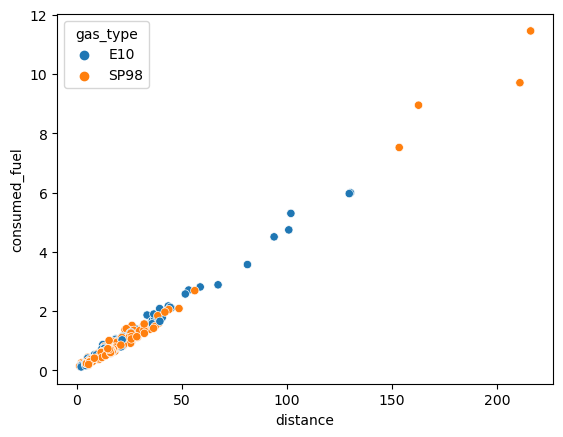

In [79]:
sns.scatterplot(data=df, x='distance', y='consumed_fuel', hue='gas_type')

<Axes: xlabel='speed', ylabel='consumed_fuel'>

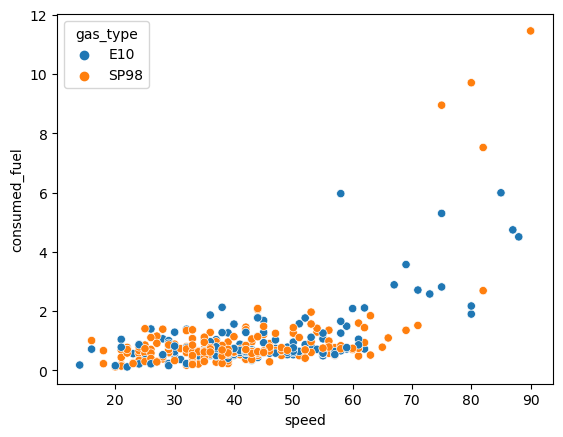

In [80]:
sns.scatterplot(data=df, x='speed', y='consumed_fuel', hue='gas_type')

In [93]:
df.groupby('gas_type')[['distance', 'speed', 'consumed_fuel']].agg(['count', 'mean', 'std'])

distance                       speed                        \
            count       mean        std count       mean        std   
gas_type                                                              
E10           160  21.096250  20.307234   160  43.506250  14.077949   
SP98          228  18.639912  24.179598   228  40.820175  13.170122   

         consumed_fuel                      
                 count      mean       std  
gas_type                                    
E10                160  1.008933  0.956864  
SP98               228  0.883618  1.214646

In [115]:
df[['temp_inside', 'temp_outside', 'AC']][df['temp_inside'].isna()]

,temp_inside,temp_outside,AC
93,NaN,10,0
95,NaN,11,0
97,NaN,9,0
98,NaN,9,0
99,NaN,10,0
100,NaN,9,0
102,NaN,9,0
201,NaN,15,0
203,NaN,17,0
261,NaN,15,0


In [116]:
df[['temp_inside', 'temp_outside','AC']]

,temp_inside,temp_outside,AC
0,21.5,12,0
1,21.5,13,0
2,21.5,15,0
3,21.5,14,0
4,21.5,15,0
...,...,...,...
383,24.5,18,0
384,25.0,31,1
385,25.0,19,0
386,25.0,31,1


## Second file

In [83]:
df_2 = pd.read_excel('data/measurements2.xlsx')

In [84]:
df_2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [86]:
df_2.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

**The file is the same as csv**

## else